# <center>Class 4<br>Part 1: Plotly</center>
 
## Opjectives
In this class we will learn:
<ul>
    <li>How to create basic plotly graphs</li>
    <li>How to edit plotly graphs via update layout</li>
    <li>Creaing more complex graphic structures</li>
    <li>Making a Choropleth graph</li>
</ul>

### First things first: we need data

In [1]:
import pandas as pd
import yfinance as yf

ticker_list = 'AAPL, TSLA, MSFT, BAC, GS, AAL'
myTickers = yf.Tickers(ticker_list)
stock_prices = myTickers.history(period="max")

stock_prices.head()

[*********************100%***********************]  6 of 6 completed


Close                              Dividends                ...  \
             AAL AAPL       BAC  GS MSFT TSLA       AAL AAPL  BAC  GS  ...   
Date                                                                   ...   
1973-02-21   NaN  NaN  1.669042 NaN  NaN  NaN       NaN  NaN  0.0 NaN  ...   
1973-02-22   NaN  NaN  1.674681 NaN  NaN  NaN       NaN  NaN  0.0 NaN  ...   
1973-02-23   NaN  NaN  1.669042 NaN  NaN  NaN       NaN  NaN  0.0 NaN  ...   
1973-02-26   NaN  NaN  1.669042 NaN  NaN  NaN       NaN  NaN  0.0 NaN  ...   
1973-02-27   NaN  NaN  1.669042 NaN  NaN  NaN       NaN  NaN  0.0 NaN  ...   

           Stock Splits               Volume                             
                    BAC  GS MSFT TSLA    AAL AAPL     BAC  GS MSFT TSLA  
Date                                                                     
1973-02-21          0.0 NaN  NaN  NaN    NaN  NaN   99200 NaN  NaN  NaN  
1973-02-22          0.0 NaN  NaN  NaN    NaN  NaN   47200 NaN  NaN  NaN  
1973-02-23          0.0 NaN  NaN  NaN    NaN  NaN  133600 NaN  NaN  NaN  
1973-02-26          0.0 NaN  NaN  NaN    NaN  NaN   24000 NaN  NaN  NaN  
1973-02-27          0.0 NaN  NaN  NaN    NaN  NaN   41600 NaN  NaN  NaN  

[5 rows x 42 columns]

## 1. Creating a simple plot

In [2]:
import plotly.express as px

AAL = stock_prices['Close'][['AAL']].dropna()        # Keeping the double bracket makes it a DF
fig = px.line(AAL, y="AAL", x=AAL.index)
fig.show()

fig = px.scatter(AAL, y="AAL", x=AAL.index)
fig.show()


The graph above looks very generic, let's try to make it look better. Notice that:
<ul>
    <li>I already have plotly express and the data in AAL</li>
    <li>In, fact, I even have the plot ready</li>
</ul>

In [3]:
# First, let's have a look at the graph construction
print(fig)

Figure({
    'data': [{'hovertemplate': 'Date=%{x}<br>AAL=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([datetime.datetime(2005, 9, 27, 0, 0),
                          datetime.datetime(2005, 9, 28, 0, 0),
                          datetime.datetime(2005, 9, 29, 0, 0), ...,
                          datetime.datetime(2022, 2, 16, 0, 0),
                          datetime.datetime(2022, 2, 17, 0, 0),
                          datetime.datetime(2022, 2, 18, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([18.19490623, 19.32620049, 19.05280876, ..., 18.81999969, 18.21999931,
                          17.87000084]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
         

In [4]:
# I can call the update method enbedded in plotly express:
fig.update_layout(
    # this is a function taking multiple kwargs where complex args have to be passed as dictionaries
    title = {
        'text': 'American Airlines Historical Price',
        'y': 1,
        'x': 0.5,
        'font': {'size': 22}
    },
    paper_bgcolor = 'white',
    plot_bgcolor = 'white',
    autosize = False,
    height = 300,
    xaxis = {
        'title': 'Closing Date',
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black'
    },
    yaxis = {
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black'
    }
)

# This updates the data portion
fig.update_traces(line = {'color': 'gray', 'width': 1})

# check this and see what happens
# fig.update_traces(line = {'color': 'gray', 'wwidth': 1})

fig.show()

Let's try adding some time-series features to this:

In [5]:
fig.update_layout(
    xaxis=dict(
        rangeselector = dict(
            buttons = list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="todate"
                     ),
                dict(count=6,
                     label="6m",
                     step="month",
                     # stepmode="backward"
                     ),
                dict(count=1,
                     label="YTD",
                     step="year",
                     # stepmode="todate"
                     ),
                dict(count=2,
                     label="1y",
                     step="year",
                     # stepmode="backward"
                     ),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date",
    )
)
fig.show()

## 2. Creating more complex graphics
### Let's get deeper into plotly
So far, we have seen the express capabilities of plotly. This is a high level API (not many configurable options). Let's now look into the full API.

In [11]:
import plotly.graph_objects as go

# with the full graphics object, we can create a template figure which is fully flexible.
fig = go.Figure()

# the new figure, is now ready to have anything added to it:
fig.add_trace(go.Scatter(y=AAL["AAL"].to_list(), x=AAL.index.to_list()))
fig.show()

The above graph is pretty naked in comparison to the express graph. But, we can add all the detailst to it very easily via updates:

In [13]:
# I can call the update method enbedded in plotly express:
fig.update_layout(
    # this is a function taking multiple kwargs where complex args have to be passed as dictionaries
    title = {
        'text': 'American Airlines Historical Price',
        'y': 0.95,
        'x': 0.5,
        'font': {'size': 22}
    },
    paper_bgcolor = 'white',
    plot_bgcolor = 'white',
    autosize = False,
    height = 400,
    xaxis = {
        'title': 'Closing Date',
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black'
    },
    yaxis = {
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black'
    }
)

# # This updates the data portion
fig.update_traces(line = {'color': 'gray', 'width': 1})

fig.update_layout(
    xaxis=dict(
        rangeselector = dict(
            buttons = list([
                dict(count=1,
                     label="1m",
                     step="month",
                     # stepmode="backward"
                     ),
                dict(count=6,
                     label="6m",
                     step="month",
                     # stepmode="backward"
                     ),
                dict(count=1,
                     label="YTD",
                     step="year",
                     # stepmode="todate"
                     ),
                dict(count=1,
                     label="1y",
                     step="year",
                     # stepmode="backward"
                     ),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date",
    )
)

fig.show()

Here's the fun part: we can add a new scatter to this without having to start from scratch.

In [8]:
BAC = stock_prices['Close'][['BAC']].dropna()
fig.add_trace(go.Scatter(y = BAC["BAC"].to_list(), x = BAC.index.to_list()))
fig.update_layout(
    title = {'text': 'Historical Stock Prices'}
)
print(fig)
fig.show()

Figure({
    'data': [{'line': {'color': 'gray', 'width': 1},
              'type': 'scatter',
              'x': [2005-09-27 00:00:00, 2005-09-28 00:00:00, 2005-09-29 00:00:00,
                    ..., 2022-02-11 00:00:00, 2022-02-14 00:00:00, 2022-02-15
                    00:00:00],
              'y': [18.194908142089844, 19.326200485229492, 19.052804946899414,
                    ..., 17.610000610351562, 17.43000030517578, 18.5]},
             {'type': 'scatter',
              'x': [1973-02-21 00:00:00, 1973-02-22 00:00:00, 1973-02-23 00:00:00,
                    ..., 2022-02-11 00:00:00, 2022-02-14 00:00:00, 2022-02-15
                    00:00:00],
              'y': [1.669042706489563, 1.6746807098388672, 1.669042706489563, ...,
                    47.91999816894531, 47.41999816894531, 47.8650016784668]}],
    'layout': {'autosize': False,
               'height': 400,
               'paper_bgcolor': 'white',
               'plot_bgcolor': 'white',
               'template': '.

And just like before, we can give some format to the second line<br>
A few things to notice:
<ul>
    <li>It is easier to update the traces when they have been properly named. This can me added to each trace upon creation.</li>
    <li>Everything listed within the figure element</li>
</ul>

In [9]:
# Add 1 more trace with a name
MSFT = stock_prices['Close'][['MSFT']].dropna()
fig.add_trace(go.Scatter(y = MSFT["MSFT"].to_list(), x = MSFT.index.to_list(), name = 'MSFT'))
print(fig)

Figure({
    'data': [{'line': {'color': 'gray', 'width': 1},
              'type': 'scatter',
              'x': [2005-09-27 00:00:00, 2005-09-28 00:00:00, 2005-09-29 00:00:00,
                    ..., 2022-02-11 00:00:00, 2022-02-14 00:00:00, 2022-02-15
                    00:00:00],
              'y': [18.194908142089844, 19.326200485229492, 19.052804946899414,
                    ..., 17.610000610351562, 17.43000030517578, 18.5]},
             {'type': 'scatter',
              'x': [1973-02-21 00:00:00, 1973-02-22 00:00:00, 1973-02-23 00:00:00,
                    ..., 2022-02-11 00:00:00, 2022-02-14 00:00:00, 2022-02-15
                    00:00:00],
              'y': [1.669042706489563, 1.6746807098388672, 1.669042706489563, ...,
                    47.91999816894531, 47.41999816894531, 47.8650016784668]},
             {'name': 'MSFT',
              'type': 'scatter',
              'x': [1986-03-13 00:00:00, 1986-03-14 00:00:00, 1986-03-17 00:00:00,
                    ..., 2022

In [10]:
# Names can be updated in bulk, based on the order the traces were added
names = ['AAL', 'BAC', 'MSFT']
fig.for_each_trace(lambda t: t.update(name = names.pop(0)))   #that's a fun way of doing it

# now that each plot has a name, it is easy to uptade it via selecto
fig.update_traces(selector = {'name': 'BAC'}, line = {'color': 'blue'})
fig.update_traces(selector = {'name': 'MSFT'}, line = {'color': 'lightgreen'})

fig.show()

Clearly, MSFT overshadows the other, making it harder to see the actual price changes. Let's recreate the graph but with MSFT on it's own.

In [11]:
from plotly.subplots import make_subplots

# with the full graphics object, we can create a template figure which is fully flexible.
fig = make_subplots(specs = [[{'secondary_y': True}]])

fig.add_trace(go.Scatter(y=AAL["AAL"].to_list(), x=AAL.index.to_list(), name = 'AAL'), 
              secondary_y = False )
fig.add_trace(go.Scatter(y = BAC["BAC"].to_list(), x = BAC.index.to_list(), name = 'BAC'), 
              secondary_y = False )
fig.add_trace(go.Scatter(y = MSFT["MSFT"].to_list(), x = MSFT.index.to_list(), name = 'MSFT'), 
              secondary_y = True )

fig.update_layout(
    title = {
        'text': 'Historical Stock Prices<Br>Dual-Axed Graph',
        'y': 0.95,
        'x': 0.5,
        'font': {'size': 22}
    },
    paper_bgcolor = 'white',
    plot_bgcolor = 'white',
    autosize = False,
    # height = 300,
    xaxis = {
        'title': 'Closing Date',
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black',
        'domain': [0, 0.945]        # just for showing the effect
    },
    yaxis = {
        'title': 'BAC - AAL',
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black'
    },
    yaxis2 = {
        'title': 'MSFT',
        'showline': True, 
        'linewidth': 1,
        'linecolor': 'black',
        'anchor': 'free',
        'side': 'right',
        'position': 0.95
    },
    legend = {
        'orientation': 'h',
        #This orients lhe legend but it will result in an overlay of the graph
        # 'yanchor': 'top', 'y': 0.9,
        'yanchor': 'top', 'y': 1.15,
        'xanchor': 'left', 'x': 0,
    },
    # this fixes the overlay
    margin = {'t': 100},
    
)

# shows all the tooltips at once
fig.layout.hovermode = 'x'

# hiding a trace
#fig.update_traces(selector = {'name': 'BAC'}, visible = 'legendonly')

fig.show()

## 3. Additional Complex Graphs
So far, we have use plotted lines and scatterplots. But that is only one type of graph available in Plotly. Let's check out other graphing tools. Let's make our dataframe a little more interesting by adding returns.<br><br>
We'll keep: prices, returns, and volume.

In [12]:
import numpy as np

price = stock_prices['Close'].copy()
volume = stock_prices['Volume'].copy()
returns = (price/price.shift(1)).apply(np.log, axis = 1)*100

In [13]:
# in case we want to use yearly returns, we can group by year
# returns = (price/price.shift(1)).apply(np.log, axis = 1)*100
# returns.groupby(returns.index.year).mean()

Let's plot a bar chart of the returns of AAL grouped by the price level. For starters, let's do it on a $5 interval.

In [14]:
df = price[['AAL']].merge(volume[['AAL']], left_index = True, right_index = True).merge(
                            returns[['AAL']], left_index = True, right_index = True).dropna()
df.columns = ['Price', 'Volume', 'Return']

# we need to use pandas cut to create the groups so that we can bin the different categories
# Technically, prices have a 0-value lower limit. But, we can get the lower bound dynamically
bin_min = df['Price'].min()
bin_max = df['Price'].max()
bin_size = 5
pctls = [round(x*bin_size + bin_min, 2) for x in range(int(bin_max // bin_size))]
print(pctls)


[1.66, 6.66, 11.66, 16.66, 21.66, 26.66, 31.66, 36.66, 41.66, 46.66, 51.66]


In [15]:
# Now, let's cut the df based on the above cut-off points
df['labels'] = pd.cut(df['Price'], pctls)
df

Price      Volume    Return          labels
Date                                                       
2005-09-28  19.326200   5747900.0  6.031993  (16.66, 21.66]
2005-09-29  19.052805   1078200.0 -1.424738  (16.66, 21.66]
2005-09-30  19.806999   3123300.0  3.882104  (16.66, 21.66]
2005-10-03  20.268944   1057900.0  2.305448  (16.66, 21.66]
2005-10-04  20.891150   1768800.0  3.023575  (16.66, 21.66]
...               ...         ...       ...             ...
2022-02-09  18.760000  42407300.0  2.701407  (16.66, 21.66]
2022-02-10  18.709999  36411800.0 -0.266886  (16.66, 21.66]
2022-02-11  17.610001  50162700.0 -6.059113  (16.66, 21.66]
2022-02-14  17.430000  37395900.0 -1.027408  (16.66, 21.66]
2022-02-15  18.500000  15674190.0  5.957786  (16.66, 21.66]

[4125 rows x 4 columns]

In [16]:
y = df['Return'].groupby(df['labels']).mean().to_list()

fig = go.Figure(data = go.Bar(name='AAL', x = pctls,
                                y=y))

fig.show()

Let's try the same thing for all the securities, plus some formatting. Here's a couple of things to consider:
<ul>
    <li>We need to plot each series separately.</li>
    <li>The bins are the same for all series. So we should consolidate the buckets/bins.</li>
    <li>The easiest way to do this is to stack all ther series in the same Price/Return column.</li>
</ul>

In [17]:
# Let's use the same thing we did for AAL, but for all the equities. 
names = price.columns

df = pd.DataFrame()
for name in names:
    df_tmp = price[[name]].merge(volume[[name]], left_index = True, right_index = True).merge(
                            returns[[name]], left_index = True, right_index = True).dropna()
    df_tmp.columns = ['Price', 'Volume', 'Return']
    df_tmp['name'] = name
    df = df.append(df_tmp)
df.sort_index().tail(10)

Price      Volume    Return  name
Date                                              
2022-02-14   17.430000  37395900.0 -1.027408   AAL
2022-02-14  360.239990   2584100.0 -0.779765    GS
2022-02-14   47.419998  44750600.0 -1.048887   BAC
2022-02-14  875.760010  22515100.0  1.815970  TSLA
2022-02-15   18.500000  15674190.0  5.957786   AAL
2022-02-15  170.949997  15991823.0  1.218267  AAPL
2022-02-15  364.762207    439406.0  1.247520    GS
2022-02-15   47.865002  12895689.0  0.934054   BAC
2022-02-15  299.450012   6736566.0  1.497214  MSFT
2022-02-15  917.344971   8238825.0  4.639150  TSLA

As before, we need to instanciate the plotly figure with the Data. So we have to create the data first. The data should be a list of plotly go objects.

In [18]:
#this appends the data
data = []
for name in names:
    # We need to get the grouping by name
    this_name = df.loc[df['name'] == name].reset_index(drop=True)
    this_name['labels'] = pd.qcut(this_name['Price'], 10)
    this_data = this_name['Return'].groupby(this_name['labels']).mean()
    data.append(
        go.Bar(
            name = name, 
            x = [str(round(x.left, 2)) + '-' + str(round(x.right, 2)) for x in this_data.index.categories],
            y = this_data.to_list()
        )
    )
data

[Bar({
     'name': 'AAL',
     'x': [1.66-5.52, 5.52-8.55, 8.55-11.8, 11.8-16.89, 16.89-24.47, 24.47-31.43,
           31.43-36.11, 36.11-40.69, 40.69-45.95, 45.95-59.35],
     'y': [-0.48315655436888205, 0.060595051117389435, 0.039321049558072974,
           0.19239439739662142, 0.06509470928413102, -0.10082765749185173,
           0.0025235783087054404, 0.042881868940023556, -0.07997171326233696,
           0.265352555292573]
 }),
 Bar({
     'name': 'AAPL',
     'x': [0.04-0.1, 0.1-0.2, 0.2-0.27, 0.27-0.31, 0.31-0.38, 0.38-1.4, 1.4-5.82,
           5.82-18.08, 18.08-39.71, 39.71-181.78],
     'y': [-0.11518706631448436, 0.030597125615285093, -0.11824792765318548,
           0.09526617840223994, 0.15702317646935865, 0.19981385486572137,
           0.12557372059690694, 0.10244606393537443, 0.08886163214258717,
           0.15155707302278998]
 }),
 Bar({
     'name': 'BAC',
     'x': [0.3-0.59, 0.59-1.2, 1.2-2.29, 2.29-5.24, 5.24-8.79, 8.79-13.44,
           13.44-16.5, 16.5-22.71, 22

In [19]:
#let's make this into a function so that we can try different ways:
def make_barchart(data):
    fig = go.Figure(data = data)

    fig.update_layout(
        barmode = 'group',
        title = 'Bar Chart of Equity Returns grouped by Prices',
        paper_bgcolor = 'white',
        plot_bgcolor = 'white',
        xaxis = dict(
            showline = True, 
            linewidth = 2, 
            linecolor = 'black'
        ),
        yaxis=dict(
            title = 'Stock Returns',
            titlefont_size = 16,
            tickfont_size = 14,
            gridcolor = '#dfe5ed'
        )
    )

    fig.layout.hovermode = 'x'
    return(fig)

make_barchart(data).show()

In [20]:
# let's do ranges based on all the prices so that we can consolidate them
cut_offs = pd.qcut(df['Volume'], 10).drop_duplicates()
cut_offs_l = [round(x.left,2) for x in cut_offs]
cut_offs_r = [round(x.right,2) for x in cut_offs]
cut_offs = cut_offs_l + [cut_offs_r[-1]]
cut_offs.sort()
cut_offs

[-0.0,
 1015360.0,
 3233800.0,
 6481560.0,
 14067440.0,
 32333200.0,
 52812920.0,
 79939440.0,
 132890240.0,
 276628800.0,
 7421640800.0]

In [21]:
data = []
for name in names:
    # We need to get the grouping by name
    this_name = df.loc[df['name'] == name].reset_index(drop=True)
    this_name['labels'] = pd.cut(this_name['Volume'], cut_offs)
    this_data = this_name['Price'].groupby(this_name['labels']).mean()
    data.append(
        go.Bar(
            name = name, 
            x = [str(round(x.left, 2)) + '-' + str(round(x.right, 2)) for x in this_data.index.categories],
            y = this_data.to_list()
        )
    )

make_barchart(data).show()

Maps - do population growth with animation
Multiple plots - do a scatter/line with different time series

In [14]:

import dash
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, html, dcc, Input, Output

#%% Data Download Section

def download_data(ticker):
    myTicker = yf.Ticker(ticker)
    hist = myTicker.history(period="max")

    hist = hist.reset_index()
    hist['Date'] = pd.to_datetime(hist['Date'], errors = 'coerce')
    return hist

    # hist['Date'].max()

ticker = "AAPL"
hist = download_data(ticker)

In [16]:
returns = pd.DataFrame(hist['Open'].pct_change()[1:], columns=["returns"])

In [28]:
hist

Date        Open        High         Low       Close     Volume  \
0     1980-12-12    0.100326    0.100762    0.100326    0.100326  469033600   
1     1980-12-15    0.095528    0.095528    0.095092    0.095092  175884800   
2     1980-12-16    0.088548    0.088548    0.088112    0.088112  105728000   
3     1980-12-17    0.090293    0.090729    0.090293    0.090293   86441600   
4     1980-12-18    0.092911    0.093347    0.092911    0.092911   73449600   
...          ...         ...         ...         ...         ...        ...   
10381 2022-02-14  167.369995  169.580002  166.559998  168.880005   86185500   
10382 2022-02-15  170.970001  172.949997  170.250000  172.789993   64286300   
10383 2022-02-16  171.850006  173.339996  170.050003  172.550003   61177400   
10384 2022-02-17  171.029999  171.910004  168.470001  168.880005   69589300   
10385 2022-02-18  169.820007  170.539993  166.190002  167.300003   82614200   

       Dividends  Stock Splits  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0  
...          ...           ...  
10381        0.0           0.0  
10382        0.0           0.0  
10383        0.0           0.0  
10384        0.0           0.0  
10385        0.0           0.0  

[10386 rows x 8 columns]

In [24]:
returns = pd.DataFrame(hist['Open'].pct_change()[1:])
returns.columns = ['returns']
returns["labels"] = pd.qcut(returns["returns"], 10)
returns_mean = returns.groupby("labels")["returns"].mean()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

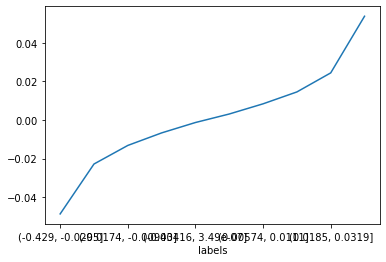

In [27]:
returns_mean.plot().bar()

In [29]:
hist["returns"] = hist["Close"].pct_change()
hist.dropna(inplace=True)
hist["labels"] = pd.qcut(hist["Volume"], 10)
returns_mean = hist.groupby("labels")["returns"].mean()

In [43]:
round(1123, -3)

1000

In [35]:
returns_mean

labels
(-0.001, 81971280.0]          -0.000340
(81971280.0, 110510400.0]     -0.000191
(110510400.0, 140196960.0]     0.000791
(140196960.0, 176861440.0]    -0.000007
(176861440.0, 220640000.0]    -0.000552
(220640000.0, 276919920.0]     0.000541
(276919920.0, 361295200.0]     0.002592
(361295200.0, 477776320.0]     0.003402
(477776320.0, 735192640.0]     0.002827
(735192640.0, 7421640800.0]    0.002183
Name: returns, dtype: float64